# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

### Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
4. Build the logistic regression model.
5. Evaluate the model.
6. Even a simple model will give us more than 70% accuracy. Why?
7. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('files_for_lab/customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=15)

In [11]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

classification.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [12]:
y_test_pred = classification.predict(X_test)
y_test_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay

In [14]:
print(accuracy_score(y_test,y_test_pred))

0.7821149751596878


In [19]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       0.81      0.92      0.86      1023
         Yes       0.66      0.43      0.52       386

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [20]:
print(cohen_kappa_score(y_test,y_test_pred))

0.38535525554840355


In [21]:
confusion_matrix(y_test,y_test_pred)

array([[937,  86],
       [221, 165]])

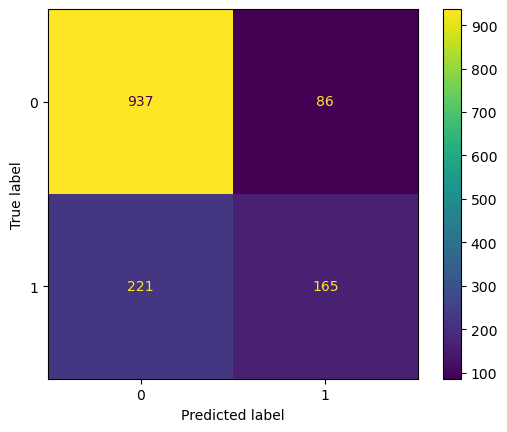

In [28]:
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred))
confusion_matrix_plot.plot()

In [38]:
y_test.value_counts()

Churn
No     1023
Yes     386
Name: count, dtype: int64

In [39]:
y_train.value_counts()

Churn
No     4151
Yes    1483
Name: count, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
#"SMOTE stands for Synthetic Minority Over-sampling Technique. It's a method used for balancing imbalanced datasets by oversampling the minority class."

In [33]:
smote = SMOTE(random_state=0)
X_smote = smote.fit(X_train, y_train)

In [34]:
X_smote 

SMOTE(random_state=0)

In [40]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [41]:
classification2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

classification2.fit(X_smote, y_smote)

LogisticRegression(multi_class='multinomial', random_state=0)

In [43]:
y_smote_test_pred = classification2.predict(X_test)
y_smote_test_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [45]:
print(classification_report(y_test, y_smote_test_pred))

              precision    recall  f1-score   support

          No       0.87      0.73      0.79      1023
         Yes       0.50      0.70      0.58       386

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409



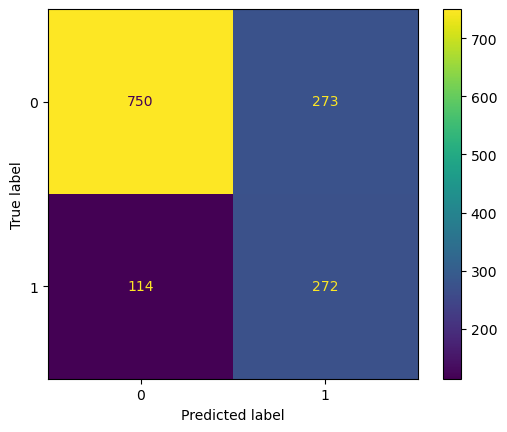

In [46]:
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix(y_test,y_smote_test_pred))
confusion_matrix_plot.plot()

In [47]:
print(cohen_kappa_score(y_test,y_smote_test_pred))

0.3880368872742944


The kappa score slighty improved.
Accuracy decreased.
Precision for No improved, while got worse for Yes.
Recall score for Yes improved.

There's not really an impact of applying SMOTE.